In [1]:
import cira

cira.auth.KEY_FILE = ""
assert not cira.auth.check_keys(), "No keys need for this one "

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from os.path import exists

In [3]:
SYMBOL = "BTC/USD"
SYM_HIST_FILE = f'./{SYMBOL.replace("/", "_")}.csv'

ast = cira.Cryptocurrency(SYMBOL)


if not exists(SYM_HIST_FILE): # chacheing historical data  
    start = datetime(2015, 5, 1)
    end = datetime(2024, 5, 1)
    ast.save_historical_data(SYM_HIST_FILE, start, end)

data = ast.load_historical_data(SYM_HIST_FILE)
data.head()

,symbol,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2021-01-01 06:00:00+00:00,BTC/USD,29255.71,29682.29,28707.56,29676.79,848.874030,29639.0,29316.444625
2021-01-02 06:00:00+00:00,BTC/USD,29678.34,34200.00,29555.99,33769.52,2144.592516,60152.0,31941.412694
2021-01-03 06:00:00+00:00,BTC/USD,33769.52,34812.93,32300.61,32908.02,1838.695433,58725.0,33505.269474
2021-01-04 06:00:00+00:00,BTC/USD,32907.36,33496.03,27900.00,30441.57,2711.189503,69226.0,31267.965121
2021-01-05 06:00:00+00:00,BTC/USD,30461.84,35851.42,29927.55,35063.00,1756.751333,61880.0,33151.367357


<Axes: xlabel='timestamp'>

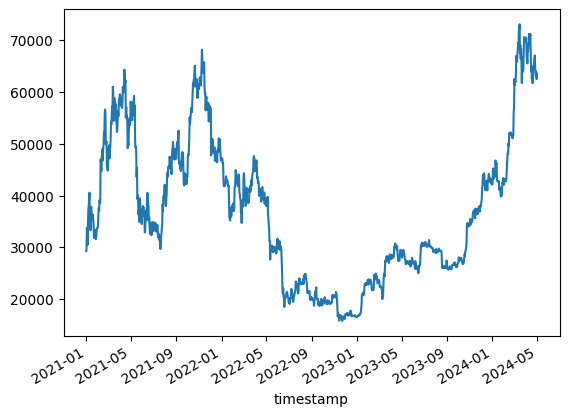

In [4]:
data["open"].plot()

<Axes: xlabel='timestamp'>

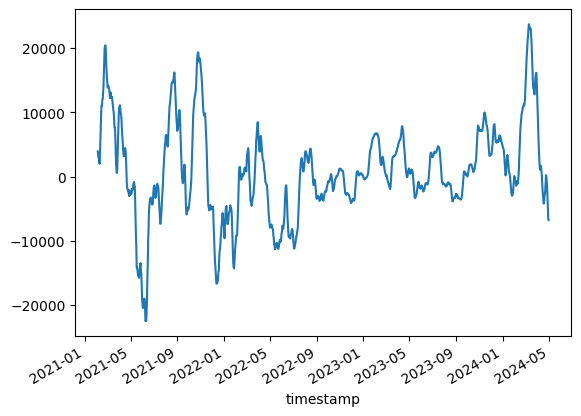

In [19]:
data["diff"] = data["open"].diff(30).rolling(5).mean()
data["diff"].plot()

In [9]:
classes = {
    "nueatral": 0,
    "light_buy": 1,
    "light_sell": 2,
    "hard_buy": 3,
    "hard_sell":4,
}

In [18]:
data["signal"] = classes["nueatral"]
data.loc[data["diff"] > 100, "signal"] = classes["light_buy"]
data.loc[data["diff"] < 100, "signal"] = classes["light_sell"]
data.loc[data["diff"] > 700, "signal"] = classes["hard_buy"]
data.loc[data["diff"] < -700, "signal"] = classes["hard_sell"]
data["signal"].head(-5)

timestamp
2021-01-01 06:00:00+00:00    0
2021-01-02 06:00:00+00:00    0
2021-01-03 06:00:00+00:00    0
2021-01-04 06:00:00+00:00    0
2021-01-05 06:00:00+00:00    0
                            ..
2024-04-21 05:00:00+00:00    4
2024-04-22 05:00:00+00:00    4
2024-04-23 05:00:00+00:00    4
2024-04-24 05:00:00+00:00    4
2024-04-25 05:00:00+00:00    4
Name: signal, Length: 1211, dtype: int64